## Importing the Hospital Dataset

In [3]:
import pandas as pd
import numpy as np

This dataset is taken from the paper "Automated knowledge acquisition from clinical narrative reports". (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2656103/)  
The dataset can also be downloaded here: https://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/

In [4]:
h_data = pd.read_csv("data/hospital_original_data.csv")

## Cleaning the dataset

Splitting the data into separate columns:

In [5]:
h_data["Disease"] = h_data["Disease"].str.split("^", expand=True)[0]
h_data["Disease"] = h_data["Disease"].str.split(":", expand=True)[1]
h_data[["disease_umls", "disease"]] = h_data["Disease"].str.split("_", expand=True)

In [6]:
h_data["Symptom"] = h_data["Symptom"].str.split("^", expand=True)[0]
h_data["Symptom"] = h_data["Symptom"].str.split(":", expand=True)[1]
h_data[["symptom_umls", "symptom"]] = h_data["Symptom"].str.split("_", expand=True)

In [7]:
h_data = h_data[["disease", "symptom", "disease_umls", "symptom_umls"]][:-1]

In [8]:
h_data

,disease,symptom,disease_umls,symptom_umls
0,hypertensive disease,pain chest,C0020538,C0008031
1,hypertensive disease,shortness of breath,C0020538,C0392680
2,hypertensive disease,dizziness,C0020538,C0012833
3,hypertensive disease,asthenia,C0020538,C0004093
4,hypertensive disease,fall,C0020538,C0085639
...,...,...,...,...
1861,affect labile,bedridden,C0233472,C0425251
1862,affect labile,prostatism,C0233472,C0242453
1863,decubitus ulcer,systolic murmur,C0011127,C0232257
1864,decubitus ulcer,frail,C0011127,C0871754


## Checking the consistency of term names and UMLS codes

In [9]:
h_data[["disease", "disease_umls", "symptom", "symptom_umls"]].nunique()

disease         133
disease_umls    133
symptom         397
symptom_umls    397
dtype: int64

Distribution of the number of symptoms associated with each disease:

<AxesSubplot:ylabel='Frequency'>

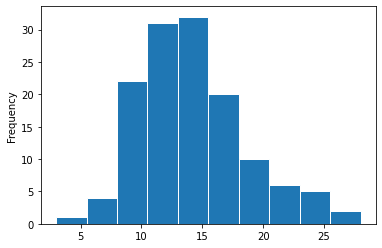

In [10]:
h_data.groupby("disease").size().plot.hist(edgecolor="white")

## References

Wang X, Chused A, Elhadad N, Friedman C, Markatou M. Automated knowledge acquisition from clinical narrative reports. AMIA Annu Symp Proc. 2008 Nov 6;2008:783-7. PMID: 18999156; PMCID: PMC2656103.